In [43]:
import pandas as pd
from nltk import sent_tokenize,word_tokenize
from textblob import TextBlob
from nltk import FreqDist
import itertools

## Loads pickled data:

In [84]:
df_first_clean = pd.read_pickle('pickled_data/data_first_clean.pkl')
df_second_clean = pd.read_pickle('pickled_data/data_second_clean.pkl')
df_second_clean

,year,President,Party,speech,second_clean_lemmatized
0,1900,William McKinley,Republican,To the Senate and House of Representatives: \n...,"[senate, house, representative, outgoing, old,..."
1,1901,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...,"[senate, house, representative, congress, asse..."
2,1902,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...,"[senate, house, representative, still, continu..."
3,1903,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...,"[senate, house, representative, country, congr..."
4,1904,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...,"[senate, house, representative, nation, contin..."
...,...,...,...,...,...
116,2017,Donald Trump,Republican,"Mr. Speaker, Mr. Vice President, Members of Co...","[mr, speaker, mr, vice, president, member, con..."
117,2018,Donald Trump,Republican,"Mr. Speaker, Mr. Vice President, Members of Co...","[mr, speaker, mr, vice, president, member, con..."
118,2019,Donald Trump,Republican,"Madam Speaker, Mr. Vice President, Members of ...","[madam, speaker, mr, vice, president, member, ..."
119,2020,Donald Trump,Republican,"Madam Speaker, Mr. Vice President, Members of ...","[madam, speaker, mr, vice, president, member, ..."


## Sentiment analysis 

In [34]:
#Sentiment analysis on Polarity and Subjectivity for all speeches:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None
    
df_first_clean['Polarity'] = df_first_clean['first_clean'].apply(sentiment).apply(lambda x: x[0])
df_first_clean['Subjectivity'] = df_first_clean['first_clean'].apply(sentiment).apply(lambda x: x[1])

df_first_clean.to_pickle('pickled_data/data_first_clean_sentiment.pkl')

df_first_clean

,year,President,Party,speech,first_clean,first_clean_tokenized,Polarity,Subjectivity
0,1900,William McKinley,Republican,To the Senate and House of Representatives: \n...,to the senate and house of representatives: at...,"[senate, house, representatives, outgoing, old...",0.115256,0.404176
1,1901,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...,to the senate and house of representatives: th...,"[senate, house, representatives, congress, ass...",0.139217,0.471688
2,1902,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...,to the senate and house of representatives: we...,"[senate, house, representatives, still, contin...",0.120273,0.497860
3,1903,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...,to the senate and house of representatives: th...,"[senate, house, representatives, country, cong...",0.119628,0.456306
4,1904,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...,to the senate and house of representatives: th...,"[senate, house, representatives, nation, conti...",0.137607,0.500679
...,...,...,...,...,...,...,...,...
116,2017,Donald Trump,Republican,"Mr. Speaker, Mr. Vice President, Members of Co...","mr. speaker, mr. vice president, members of co...","[mr, speaker, mr, vice, president, members, co...",0.146113,0.450257
117,2018,Donald Trump,Republican,"Mr. Speaker, Mr. Vice President, Members of Co...","mr. speaker, mr. vice president, members of co...","[mr, speaker, mr, vice, president, members, co...",0.113485,0.485158
118,2019,Donald Trump,Republican,"Madam Speaker, Mr. Vice President, Members of ...","madam speaker, mr. vice president, members of ...","[madam, speaker, mr, vice, president, members,...",0.114962,0.449762
119,2020,Donald Trump,Republican,"Madam Speaker, Mr. Vice President, Members of ...","madam speaker, mr. vice president, members of ...","[madam, speaker, mr, vice, president, members,...",0.137910,0.452048


### Sentiment analysis based on economic growth


In [ ]:
#Selected years of financial crisis or growth:
financial_crisis = [1930, 1931, 1932, 1986, 1987, 1988, 2008, 2009, 2010]
financial_growth = [1926, 1927, 1928, 1992, 1993, 1994, 2005, 2006, 2007]



## Word frequency 

### Before lemmatization

In [98]:
#Masks to filter on democrats and republicans
mask_democrats = (df_first_clean['Party'] == 'Democrat')
mask_republicans = (df_first_clean['Party'] == 'Republican')

#DEMOCRATS:
#Filter dataframe on democrats:
df_first_clean_democrats = df_first_clean[mask_democrats]
#Takes 'first_clean_tokenized' column and converts to list:
tokenized_speeches_democrats = df_first_clean_democrats['first_clean_tokenized'].tolist()
#Combines list of lists into one list:
tokenized_speeches_democrats = list(itertools.chain.from_iterable(tokenized_speeches_democrats))

#Republicans:
#Filter dataframe on republicans:
df_first_clean_republicans = df_first_clean[mask_republicans]
#Takes 'first_clean_tokenized' column and converts to list:
tokenized_speeches_republicans = df_first_clean_republicans['first_clean_tokenized'].tolist()
#Combines list of lists into one list:
tokenized_speeches_republicans = list(itertools.chain.from_iterable(tokenized_speeches_republicans))

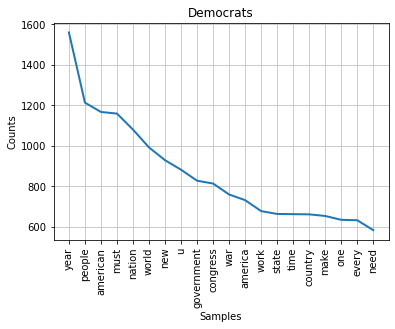

[('year', 1558),
 ('people', 1212),
 ('american', 1166),
 ('must', 1158),
 ('nation', 1079),
 ('world', 991),
 ('new', 928),
 ('u', 881),
 ('government', 827),
 ('congress', 813),
 ('war', 759),
 ('america', 731),
 ('work', 677),
 ('state', 663),
 ('time', 662),
 ('country', 661),
 ('make', 653),
 ('one', 634),
 ('every', 632),
 ('need', 583)]

In [109]:
#Checks word freq in all democrat speeches:
freqDist_democrats = FreqDist(tokenized_speeches_democrats)

freqDist_democrats.plot(20, title='Democrats')
freqDist_democrats.most_common(20)

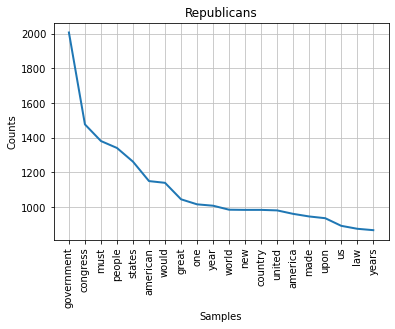

[('government', 2007),
 ('congress', 1477),
 ('must', 1381),
 ('people', 1341),
 ('states', 1262),
 ('american', 1150),
 ('would', 1140),
 ('great', 1045),
 ('one', 1016),
 ('year', 1008),
 ('world', 985),
 ('new', 984),
 ('country', 984),
 ('united', 981),
 ('america', 961),
 ('made', 946),
 ('upon', 936),
 ('us', 892),
 ('law', 875),
 ('years', 867)]

In [100]:
#Checks word freq in all republican speeches:
freqDist_republicans = FreqDist(tokenized_speeches_republicans)

freqDist_republicans.plot(20, title='Republicans')
freqDist_republicans.most_common(20)

### After lemmatization

In [104]:
#Masks to filter on democrats and republicans
mask_democrats = (df_second_clean['Party'] == 'Democrat')
mask_republicans = (df_second_clean['Party'] == 'Republican')

#DEMOCRATS:
#Filter dataframe on democrats:
df_second_clean_democrats = df_second_clean[mask_democrats]
#Takes 'second_clean_lemmatized' column and converts to list:
lemmatized_speeches_democrats = df_second_clean_democrats['second_clean_lemmatized'].tolist()
#Combines list of lists into one list:
lemmatized_speeches_democrats = list(itertools.chain.from_iterable(lemmatized_speeches_democrats))

#Republicans:
#Filter dataframe on republicans:
df_second_clean_republicans = df_second_clean[mask_republicans]
#Takes 'second_clean_lemmatized' column and converts to list:
lemmatized_speeches_republicans = df_second_clean_republicans['second_clean_lemmatized'].tolist()
#Combines list of lists into one list:
lemmatized_speeches_republicans = list(itertools.chain.from_iterable(lemmatized_speeches_republicans))

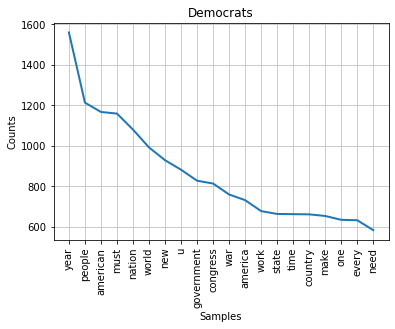

[('year', 1558),
 ('people', 1212),
 ('american', 1166),
 ('must', 1158),
 ('nation', 1079),
 ('world', 991),
 ('new', 928),
 ('u', 881),
 ('government', 827),
 ('congress', 813),
 ('war', 759),
 ('america', 731),
 ('work', 677),
 ('state', 663),
 ('time', 662),
 ('country', 661),
 ('make', 653),
 ('one', 634),
 ('every', 632),
 ('need', 583)]

In [107]:
#Checks word freq in all democrat speeches:
freqDist_democrats = FreqDist(lemmatized_speeches_democrats)

freqDist_democrats.plot(20, title='Democrats')
freqDist_democrats.most_common(20)

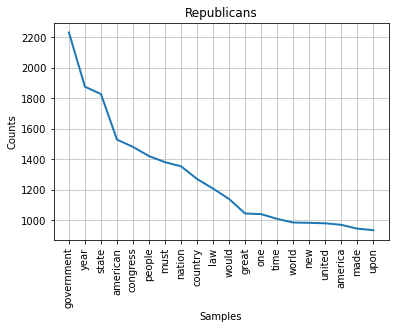

[('government', 2230),
 ('year', 1875),
 ('state', 1827),
 ('american', 1529),
 ('congress', 1481),
 ('people', 1421),
 ('must', 1381),
 ('nation', 1354),
 ('country', 1271),
 ('law', 1208),
 ('would', 1140),
 ('great', 1045),
 ('one', 1041),
 ('time', 1010),
 ('world', 986),
 ('new', 984),
 ('united', 981),
 ('america', 971),
 ('made', 946),
 ('upon', 936)]

In [106]:
#Checks word freq in all republican speeches:
freqDist_republicans = FreqDist(lemmatized_speeches_republicans)

freqDist_republicans.plot(20, title='Republicans')
freqDist_republicans.most_common(20)